In [1]:
%matplotlib widget
import ibvpy.api as ib
import matplotlib.pylab as plt
from matplotlib import cm
from scipy.interpolate import interp2d
from scipy.signal import argrelextrema
from bmcs_shear.api import CrackBridgeAdv
from bmcs_shear.dic_crack import\
    DICGrid, DICStateFields, DICCrackList, DICCrack, DICCrackCOR, DICAlignedGrid
from bmcs_shear.shear_crack.crack_path import get_T_Lab
import numpy as np
import ibvpy.api as ib
np.seterr(divide ='ignore', invalid='ignore');

In [2]:
dic_grid = DICGrid(U_factor=100, dir_name='B7_TV1', t=1)

In [3]:
dic_grid.sz_bd.system_

In [4]:
dic_grid.read_beam_design()

In [5]:
from bmcs_shear.dic_crack import DICStressProfile
#dic_grid = DICGrid(start_t=0, end_t=1, U_factor=100, dir_name='B9_TV1', t=1)
dsf = DICStateFields(dic_grid=dic_grid)

In [6]:
l_cb = dic_grid.d_x * 1
dsf.tmodel_.trait_set(E=5000, c_T=0, nu=0.18, epsilon_0=0.0005, epsilon_f=0.02/l_cb, eps_max=0.005);
dsf.eval()

In [9]:
a_grid = DICAlignedGrid(dsf=dsf)

In [10]:
a_grid.interact()

In [9]:
dcl = DICCrackList(dsf=dsf)
dcl.identify_cracks()
dcl.interact()

In [10]:
crack_s = dcl.items['0']
crack_s.interact()

In [11]:
dc_cor = DICCrackCOR(dic_crack = crack_s)
sp = DICStressProfile(dic_crack = crack_s)

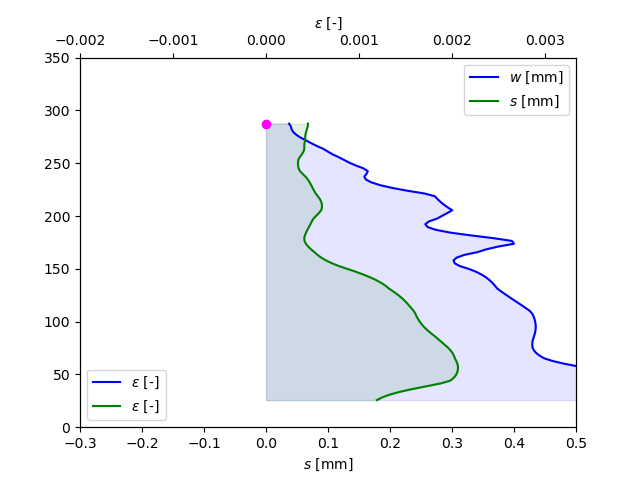

In [12]:
import bmcs_utils.api as bu
fig, ax = plt.subplots()
crack_s.plot_u_t_crc_Kb(ax)
x1, x2 = ax.get_xlim()
ax2=ax.twiny()
crack_s.plot_eps_t_Kab(ax2)
ax2.set_xlim([-0.0020,0.0020])
ax.set_xlim([-0.1,0.5])
plt.ylim([0, 350])
bu.mpl_align_xaxis(ax, ax2)
plt.show()

In [13]:
x_t_cor_a = crack_s.cor.X_cor_rot_t_a
x_t_cor_pa = crack_s.cor.X_cor_rot_t_pa_sol
v_rot_t_pa, W_rot_pa = crack_s.cor.VW_rot_t_pa

In [14]:
a_grid = crack_s.cl.a_grid
X0_t_a = a_grid.X_t_MNa[a_grid.M0, a_grid.N0]

In [15]:
x_t_cor_a_ = np.einsum('a, ab->b', x_t_cor_a, a_grid.T_t_ab)
x_t_cor_pa_ = np.einsum('pa, ab->pb', x_t_cor_pa, a_grid.T_t_ab)
v_rot_t_pa_ = np.einsum('pa, ab->pb', v_rot_t_pa, a_grid.T_t_ab)

In [16]:
x_t_cor_a_ = np.einsum('ba,...a->...b', a_grid.T_t_ab, x_t_cor_a)
x_t_cor_pa_ = np.einsum('ba,...a->...b', a_grid.T_t_ab, x_t_cor_pa)
v_rot_t_pa_ = np.einsum('ba,...a->...b', a_grid.T_t_ab, v_rot_t_pa)
#np.einsum('ba,...a->...b', self.T_ab, self.X_pull_MNa)

In [17]:
X_t_cor_a = x_t_cor_a_ + X0_t_a
X_t_cor_pa = x_t_cor_pa_ + X0_t_a[np.newaxis, :]
V_rot_t_pa = v_rot_t_pa_ + X0_t_a[np.newaxis, :]

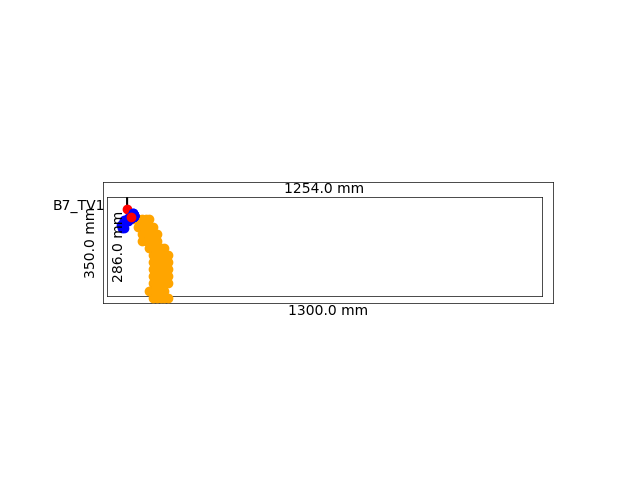

In [18]:
%matplotlib widget
import bmcs_utils.api as bu
crack_s.cor.trait_set(step_N_COR=2)
fig, ax = plt.subplots()
dcl.dsf.dic_grid.plot_bounding_box(ax)
dcl.dsf.dic_grid.plot_box_annotate(ax)
crack_s.bd.plot_sz_bd(ax)

crack_s.plot_x_1_Ka(ax)
ax.plot(*V_rot_t_pa.T, 'o', color='orange');
ax.plot(*X_t_cor_pa.T, 'o', color='blue');
ax.plot([X_t_cor_a[0]], [X_t_cor_a[1]], 'o', color='red');
ax.axis('equal');
# crack_s.cor.plot_VW_rot_t(ax)
#crack_s.cor.plot_X_cor_rot_t(ax)

Transformation between global system and the crack-centered coordinates and displacements must verified - nomenclature of the symbols `X` is the global `x` is the local symbol. Pull and and align used in a_grid expresses the displacements in the local coordinate system. Inversally rotate and push must be done to return from local to global system. 